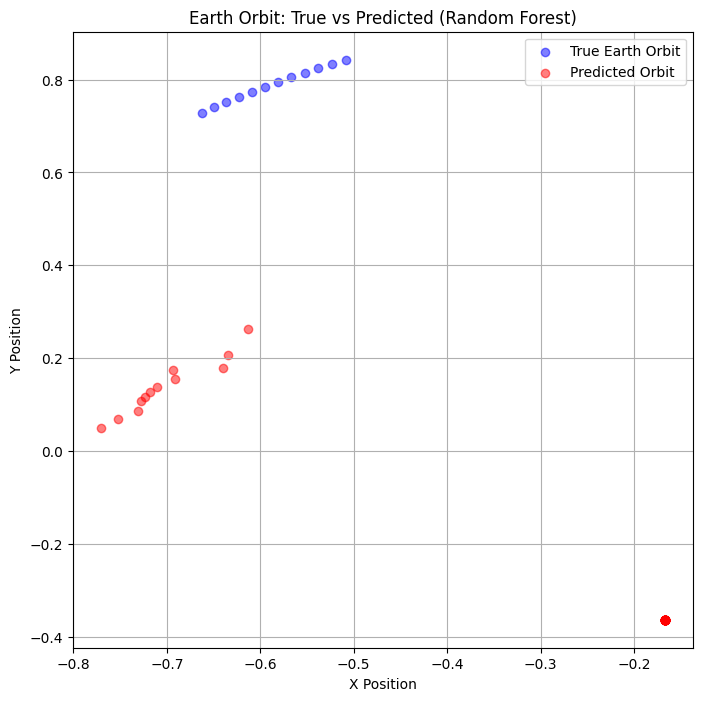

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Load your trimmed data (2 years only)
data = pd.read_csv("data/solar_system_data - Copy.csv")

# 2. Create features (Mercury, Venus, Mars positions) and target (Earth_x, Earth_y)
features = data[['Mercury_x', 'Mercury_y', 'Venus_x', 'Venus_y', 'Mars_x', 'Mars_y']]
target_x = data['Earth_x']
target_y = data['Earth_y']

# 3. Split the data
X_train, X_test, y_train_x, y_test_x = train_test_split(features, target_x, test_size=0.05, shuffle=False)
_, _, y_train_y, y_test_y = train_test_split(features, target_y, test_size=0.05, shuffle=False)

# 4. Train Random Forest models
model_x = RandomForestRegressor()
model_y = RandomForestRegressor()

model_x.fit(X_train, y_train_x)
model_y.fit(X_train, y_train_y)

# 5. Predict
y_pred_x = model_x.predict(X_test)
y_pred_y = model_y.predict(X_test)

# 6. Plot predictions
plt.figure(figsize=(8,8))
plt.scatter(y_test_x, y_test_y, color='blue', label='True Earth Orbit', alpha=0.5)
plt.scatter(y_pred_x, y_pred_y, color='red', label='Predicted Orbit', alpha=0.5)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Earth Orbit: True vs Predicted (Random Forest)')
plt.legend()
plt.grid()
plt.show()
